In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('Nutrient_Composition_Dataset.csv') 

In [4]:
df.head()

,S.No,Protein,Fat,vitaminC,Fibre,Product
0,1,0.452369,1.170926,1.079271,1.702960,"Amaranth leaves, cooked, boiled, drained, with..."
1,2,2.321087,0.706856,0.350088,0.658249,Bacon and beef sticks
2,3,0.884554,1.186571,2.428544,1.984562,"Apples, frozen, unsweetened, unheated (Include..."
3,4,0.715501,0.577599,0.270925,0.369266,"Alcoholic beverage, beer, light, BUD LIGHT"
4,5,0.132610,0.544521,0.116884,0.557309,"Alcoholic beverage, daiquiri, canned"


In [5]:
df.iloc[:,1:5].describe() 

,Protein,Fat,vitaminC,Fibre
count,1746.000000,1746.000000,1746.000000,1746.000000
mean,0.922470,0.900091,0.900146,0.900830
std,0.627128,0.634617,0.623847,0.626875
min,0.000128,0.000267,0.000029,0.002579
25%,0.435853,0.394784,0.419103,0.389124
50%,0.813025,0.804687,0.796290,0.820783
75%,1.295106,1.298988,1.280870,1.295732
max,4.016890,3.979364,4.013322,3.570331


In [6]:
data = df.iloc[:, 1:5] 

In [7]:
data.head()

,Protein,Fat,vitaminC,Fibre
0,0.452369,1.170926,1.079271,1.702960
1,2.321087,0.706856,0.350088,0.658249
2,0.884554,1.186571,2.428544,1.984562
3,0.715501,0.577599,0.270925,0.369266
4,0.132610,0.544521,0.116884,0.557309


In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [9]:
wardlink = linkage(data, method = 'ward')

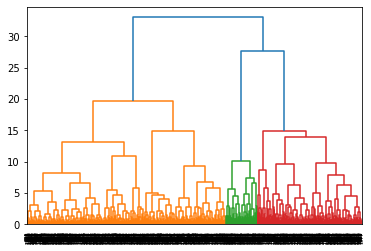

In [10]:
dend = dendrogram(wardlink)

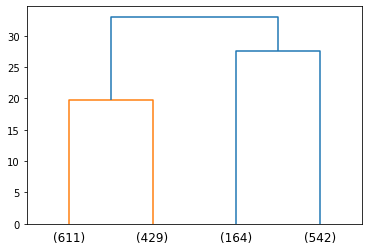

In [14]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 4,
                 )

In [15]:
from scipy.cluster.hierarchy import fcluster

In [16]:
#Method 1
clusters = fcluster(wardlink, 5, criterion='maxclust')
clusters

array([2, 1, 3, ..., 1, 2, 4], dtype=int32)

In [17]:
np.unique(clusters)

array([1, 2, 3, 4, 5], dtype=int32)

In [30]:
# Method 2
distanceclusters = fcluster(wardlink, 25, criterion='distance')
distanceclusters

array([1, 1, 2, ..., 1, 1, 3], dtype=int32)

In [31]:
np.unique(distanceclusters)

array([1, 2, 3], dtype=int32)

In [24]:
df['clusters'] = clusters

In [25]:
df.head()

,S.No,Protein,Fat,vitaminC,Fibre,Product,clusters
0,1,0.452369,1.170926,1.079271,1.702960,"Amaranth leaves, cooked, boiled, drained, with...",2
1,2,2.321087,0.706856,0.350088,0.658249,Bacon and beef sticks,1
2,3,0.884554,1.186571,2.428544,1.984562,"Apples, frozen, unsweetened, unheated (Include...",3
3,4,0.715501,0.577599,0.270925,0.369266,"Alcoholic beverage, beer, light, BUD LIGHT",1
4,5,0.132610,0.544521,0.116884,0.557309,"Alcoholic beverage, daiquiri, canned",1


In [26]:
df.to_csv('hc.csv')